In [1]:
using LibGEOS
using Plots
using Interact
using StaticArrays

loading Revise


In [2]:
function rotmat(θ)
  s = sin(θ)
  c = cos(θ)
  return SMatrix{2,2}(c, s, -s, c)
end

rotmat (generic function with 1 method)

In [3]:
pa1 = Polygon([
        [[1.0, 2.0], [2.0, 4.0], [0.5, 0.5] ,[1.0, 2.0]] .+ [[2.0, 2.0]]
        ])
p2 = Polygon([
        [[1.0, 2.0], [2.0, 4.0], [0.5, 0.5] ,[1.0, 2.0]] .+ [[2.0, 4.0]]
        ])

LibGEOS.Polygon(Ptr{Ptr{Void}} @0x00007fb8636aa158)

In [5]:
function transform(A, b, polygon::LibGEOS.Polygon)
    LibGEOS.Polygon([[A * vertex + b for vertex in vertices] for vertices in LibGEOS.coordinates(polygon)]) 
end

function transform(A, b, polygon::LibGEOS.MultiPolygon)
    LibGEOS.MultiPolygon([[[A * vertex + b for vertex in vertices] for vertices in polygon] for polygon in LibGEOS.coordinates(polygon)]) 
end


transform (generic function with 2 methods)

In [6]:
center_poly(poly) = transform(eye(2), -mean([mean(ring) for ring in LibGEOS.coordinates(poly)]), poly)

center_poly (generic function with 1 method)

In [7]:
pa1 = center_poly(pa1)
p2 = center_poly(p2)

LibGEOS.Polygon(Ptr{Ptr{Void}} @0x00007fb8635d3198)

In [8]:
last_poly = nothing
@manipulate for θ = 0:5:360, x = 0:.1:3, θo = 0:5:360, xo = 0:.1:3
    global last_poly
    plt = plot(;aspect_ratio=1.0)
    
    p1 = transform(Array(rotmat(deg2rad(θ))), [x, 0], pa1)
    plot!(plt, p1; fillalpha=0.0)
    plot!(plt, p2; fillalpha=0.0)
    d =  LibGEOS.difference(p1, p2)
    
    plot!(plt, transform(Array(rotmat(deg2rad(θo))), [xo, 0], d), alpha=0.5)
    
    
    last_poly = d
    plt
end

Interact.Options{:SelectionSlider,Int64}(1: "input" = 180 Int64 , "θ", 180, "180", 37, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict(210=>"210",275=>"275",360=>"360",85=>"85",215=>"215",160=>"160",25=>"25",55=>"55",170=>"170",155=>"155"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 1.5 Float64 , "x", 1.5, "1.5", 16, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(0.6=>"0.6",0.3=>"0.3",1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",0.7=>"0.7",0.0=>"0.0"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(5: "input-3" = 180 Int64 , "θo", 180, "180", 37, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict(210=>"210",275=>"275",360=>"360",85=>"85",215=>"215",160=>"160",25=>"25",55=>"55",170=>"170",155=>"155"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(7: "input-4" = 1.5 Float64 , "xo", 1.5, "1.5", 16, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(0.6=>"0.6",0.3=>"0.3",1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",0.7=>"0.7",0.0=>"0.0"…)), Any[], Any[], true, "horizontal", true)

In [9]:
function alloccheck(poly)
    return LibGEOS.getCoordinates(LibGEOS.getCoordSeq(LibGEOS.exteriorRing(p1.ptr)))[1][1][1]
end

alloccheck (generic function with 1 method)

In [10]:
@time alloccheck(p1)

LoadError: [91mUndefVarError: p1 not defined[39m

In [11]:
LibGEOS.difference(p, p2)

LibGEOS.MultiPolygon(Ptr{Ptr{Void}} @0x00007fb86491c598)

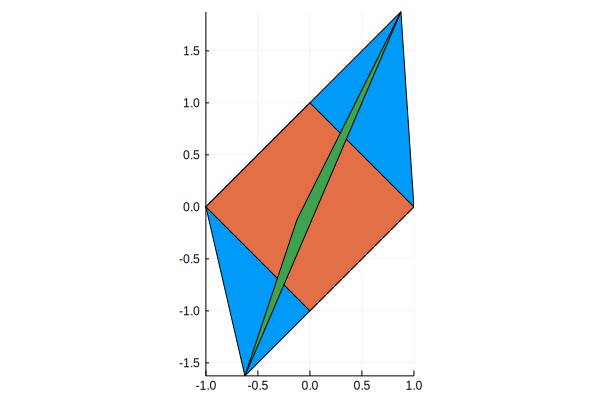

In [12]:
plot([convexhull(LibGEOS.uniquePoints(LibGEOS.union(p,p2))), p,p2])

In [13]:
LibGEOS.coordinates(LibGEOS.union(p,p2))

1-element Array{Array{Array{Float64,1},1},1}:
 Array{Float64,1}[[0.35, 0.65], [1.0, 0.0], [0.0, -1.0], [-0.25, -0.75], [-0.625, -1.625], [-0.3125, -0.6875], [-1.0, 0.0], [0.0, 1.0], [0.291667, 0.708333], [0.875, 1.875], [0.35, 0.65]]

In [14]:
Cchar

Int8

In [39]:
# didn't work
let
    using LibGEOS: GEOSContextHandle_t, GEOSGeometry, _context, GEOSGeom, GEOSContext, libgeos
    global GEOSCoordSeq_isCCW_r
    global geom_isCCW
    global is_ccw
    
    function GEOSCoordSeq_isCCW_r(handle::GEOSContextHandle_t,g::Ptr{GEOSGeometry},is_ccw::Ptr{Cchar})
        ccall((:GEOSArea_r,libgeos),Cint,(GEOSContextHandle_t,Ptr{GEOSGeometry},Ptr{Cchar}),handle,g,is_ccw)
    end
   
    let out = Int8[0] #= Array{Int}(undef, 1) =#
        global geom_isCCW
        function geom_isCCW(ptr::GEOSGeom, context::GEOSContext = _context)
            # Return 0 on exception, 1 otherwise
            result = GEOSCoordSeq_isCCW_r(context.ptr, ptr, pointer(out))
            if result == 0
                error("LibGEOS: Error in GEOSCoordSeq_isCCW")
            end
            out[1]
        end
    end

    is_ccw(lr::LibGEOS.LinearRing) = geom_isCCW(lr.ptr)
end

s = -1
c = [[cospi(s*2t), sinpi(s*2t)] for t in 0:.25:1]
p = Polygon([c])
plot(p)
is_ccw(LinearRing(LibGEOS.createLinearRing(LibGEOS.coordinates(p)[1])))


0